Q5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, neighbors, linear_model, preprocessing, metrics
from sklearn.model_selection import cross_val_score, train_test_split

Reading the data and encoding the B and M label values as 0 and 1

In [3]:
X = pd.read_csv('../data/wdbc.data', header=None, usecols=range(1,32))
# X, Y = data.iloc[:, :-1], data.iloc[:, -1]
Y = X[1]
X.drop([1], axis = 1, inplace=True)
le = preprocessing.LabelEncoder()
Y=le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 29)

Decision Tree Classifier<br>

Checking overfitting/underfitting

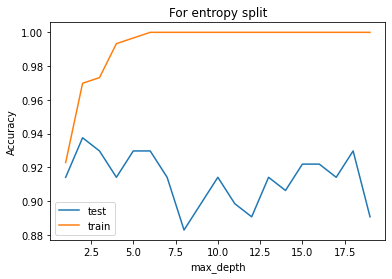

In [4]:
complexity_values = range(1,20)

train_accuracies = []
test_accuracies=[]
x_tr, x_tst, y_tr, y_tst = train_test_split(x_train, y_train, test_size=0.30, random_state= 29)

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value)
    test_accuracies.append(clf.fit(x_tr, y_tr).score(x_tst, y_tst))
    train_accuracies.append(clf.fit(x_tr, y_tr).score(x_tr, y_tr))
    
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.title('For entropy split')
plt.show()

It starts overfitting when max_depth > 3<br>

Comparing entropy and gini splits

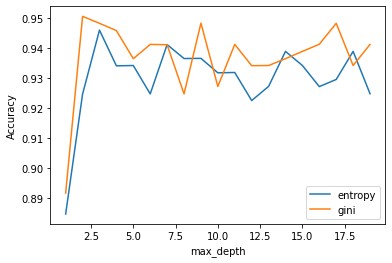

([0.8848283499446289,
  0.9248062015503876,
  0.9461240310077519,
  0.93421926910299,
  0.9343300110741971,
  0.9248615725359912,
  0.9413067552602437,
  0.936655592469546,
  0.9367109634551495,
  0.9318936877076412,
  0.9320044296788483,
  0.9226467331118494,
  0.9273532668881506,
  0.9390365448504984,
  0.9343300110741971,
  0.9272978959025471,
  0.9296788482834994,
  0.9390365448504984,
  0.9249169435215947],
 [0.8918050941306757,
  0.9507198228128461,
  0.9483942414174973,
  0.9459579180509413,
  0.9366002214839424,
  0.9413621262458471,
  0.9412513842746402,
  0.9248615725359912,
  0.9484496124031008,
  0.9273532668881506,
  0.9413621262458471,
  0.9342746400885936,
  0.9343300110741971,
  0.9366002214839423,
  0.9390365448504984,
  0.9414174972314507,
  0.9483942414174973,
  0.9343300110741971,
  0.9413621262458471])

In [5]:
complexity_values = range(1,20)
cv_accuracies1 = []
cv_accuracies2 = []

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    scores = cross_val_score(clf, x_train, y_train, cv=10)
    cv_accuracies1.append(scores.mean())
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value)
    scores = cross_val_score(clf, x_train, y_train, cv=10)
    cv_accuracies2.append(scores.mean())
    
line1, =plt.plot(complexity_values, cv_accuracies1,label='entropy_accuracy')
line2, =plt.plot(complexity_values, cv_accuracies2,label='gini_accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('entropy', 'gini'))
plt.show()
cv_accuracies1, cv_accuracies2

Choosing the max_depth = 3 and criterion="gini"<br>
Calculating performance metric<br>
Recall is chosen because falsely classifying true malignant case as benign is dangerous/costly<br>
Thus, we want the recall of malignant class (1) to be high<br>

In [6]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
dt_pred = clf.fit(x_train, y_train).predict(pd.DataFrame(x_test))
print(metrics.confusion_matrix(y_test, dt_pred))
print(metrics.recall_score(y_test, dt_pred))

[[87  3]
 [ 8 45]]
0.8490566037735849


Logistic Regression<br> 

Checking overfitting/underfitting

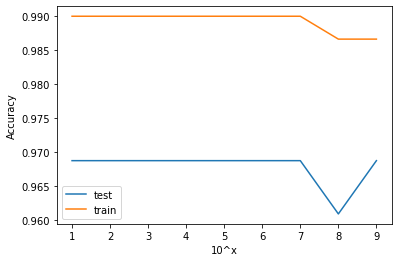

In [7]:
complexity_values = range(1,10)

sc = preprocessing.StandardScaler().fit(x_train)
x_train_lr=sc.transform(x_train)
x_train_lr=pd.DataFrame(x_train_lr)

train_accuracies = []
test_accuracies=[]
x_tr, x_tst, y_tr, y_tst = train_test_split(x_train_lr, y_train, test_size=0.30, random_state= 29)

for complexity_value in complexity_values:
    clf = linear_model.LogisticRegression(C=10^complexity_value, solver = 'liblinear')
    test_accuracies.append(clf.fit(x_tr, y_tr).score(x_tst, y_tst))
    train_accuracies.append(clf.fit(x_tr, y_tr).score(x_tr, y_tr))
    
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("10^x")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

Hyper-parameter tuning using cross-validation scores for different values of C

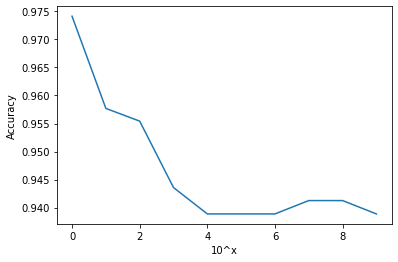

[0.974141749723145,
 0.9576965669988926,
 0.9554263565891473,
 0.9435769656699889,
 0.9388704318936878,
 0.9388704318936878,
 0.9388704318936878,
 0.9412513842746402,
 0.9412513842746402,
 0.9388704318936878]

In [21]:
sc = preprocessing.StandardScaler().fit(x_train)
x_train_lr=sc.transform(x_train)
x_train_lr=pd.DataFrame(x_train_lr)

complexity_values = range(0,10)
accuracies = []

for complexity_value in complexity_values:
    # For small datasets, ‘liblinear’ is a good choice for solver
    clf = linear_model.LogisticRegression(C=10**complexity_value, solver = 'liblinear')
    scores = cross_val_score(clf, x_train_lr, y_train, cv=10)
    accuracies.append(scores.mean())
    
line1 = plt.plot(complexity_values, accuracies, label='accuracy')
plt.xlabel("10^x")
plt.ylabel("Accuracy")
plt.show()
accuracies

Choosing C = 10**8

In [19]:
clf = linear_model.LogisticRegression(C=10**8, solver = 'liblinear')
lr_pred = clf.fit(x_train_lr, y_train).predict(pd.DataFrame(sc.transform(x_test)))
print(metrics.confusion_matrix(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))


[[87  3]
 [ 2 51]]
0.9622641509433962


In [20]:
11^8

3

KNN Classifier

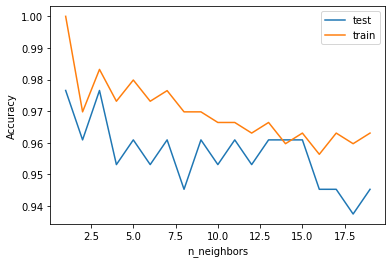

In [154]:
mm = preprocessing.MinMaxScaler().fit(x_train)
x_train_knn=mm.transform(x_train)
x_train_knn=pd.DataFrame(x_train_knn)

complexity_values = range(1,20)

train_accuracies = []
test_accuracies=[]
x_tr, x_tst, y_tr, y_tst = train_test_split(x_train_knn, y_train, test_size=0.30, random_state= 29)

for n_neighbors in complexity_values:    
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    test_accuracies.append(knn.fit(x_tr, y_tr).score(x_tst, y_tst))
    train_accuracies.append(knn.fit(x_tr, y_tr).score(x_tr, y_tr))
    
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

It is overfitting for values < 2. Therefore choosing n_neighbors = 3 because of high accuracy

In [159]:
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn_pred = knn.fit(x_train_knn, y_train).predict(pd.DataFrame(mm.transform(x_test)))
print(metrics.confusion_matrix(y_test, knn_pred))
print(metrics.recall_score(y_test, knn_pred))

[[90  0]
 [ 5 48]]


0.9056603773584906

Recall scores on the test data:<br>
Decision Tree: 0.8490566037735849<br>
kNN: 0.9056603773584906<br>
Logistic Regression: 0.9811320754716981<br>
Therefore, Logistic Regression is the preferred model.<br>